In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

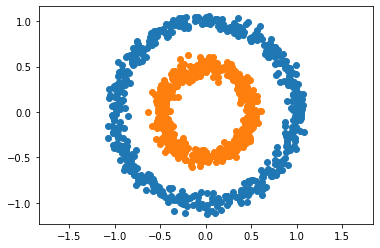

In [8]:
n_data = 1000

X,Y = make_circles(n_samples=n_data, factor=0.5, noise=0.05)

plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])

plt.axis("equal")
plt.show()

In [169]:
class NeuronalLayer():
    def __init__(self, nConn, nNeurons, actFunction):
        
        self.actFunction = actFunction
        
        self.nConn = nConn
        self.nNeurons = nNeurons
        
        self.W = np.random.rand(nConn, nNeurons)
        self.b = np.random.rand(1, nNeurons)
    
    def forward(self, inputs):
        self.output = self.actFunction[0](inputs @ self.W)
    
    def getOutput(self):
        return self.output
    
    def info(self):
        return self.nConn, self.nNeurons
    
    def puDelta(self, delta):
        self.delta = delta
    
    def getW(self):
        return self.W
    
    def getActFunction(self):
        return self.actFunction
        

        

In [113]:
relu = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

cost = (lambda Ye, Yg: np.mean((Ye - Yg)**2),
        lambda Ye, Yg: Ye - Yg)

_x = np.linspace(-5, 5, 100)
_y = np.linspace(-5, 5, 100) + 1

print (cost[0](_x, _y))

9.0


In [170]:
#Creamos la red neuronal - Array de capas

nInput = 2
topology = [2, 5, 8, 3, 1]

neuronalNetwork = []

for l in range(len(topology)):
    if (l == 0):
        neuronalLayer = NeuronalLayer(nInput, topology[l], relu[0])
    else:
        neuronalLayer = NeuronalLayer(topology[l - 1], topology[l], relu[0])
    neuronalNetwork.append(neuronalLayer)



In [171]:


for index, x in enumerate(X):
    
    #Hacemos el forward
    inputs = x
    
    for l in range(len(neuronalNetwork)):
        if (l == 0):
            neuronalNetwork[l].forward(inputs)
        else:
            neuronalNetwork[l].forward(neuronalNetwork[l - 1].getOutput())


    #Backpropagation
    for l, layer in enumerate(reversed(neuronalNetwork)):
        if (l == 0):
            cost[1](Y[index], layer.getOutput()) * layer.getActFunction[1]
            
            
    

SyntaxError: invalid syntax (<ipython-input-171-006cff26ffac>, line 16)

[[11.14947071 17.53438544]]
